In [2]:
import numpy as np
import PIL.Image as Image

In [3]:
K = np.random.randn(7, 7)
K

array([[ 0.10858923,  0.09969753, -1.80030117,  0.20725451,  2.09758459,
        -1.08786042,  2.5653546 ],
       [-0.66832884,  0.31664413,  1.8741403 , -0.26674566, -0.8541628 ,
         1.04043088, -0.02816712],
       [-0.6957895 , -0.68791732,  1.88308071, -0.18617966, -0.25936648,
        -1.02743617, -0.35756537],
       [-1.16096325, -1.02226999,  0.55758623, -0.9965474 ,  0.47244844,
        -0.85872458, -1.55236128],
       [ 2.12203111,  0.3640475 ,  0.50422021,  1.06098321,  0.83347667,
         0.21529679,  0.17796553],
       [-0.81988476,  1.04774052,  0.60119685,  1.08396723,  1.30510175,
         2.08534151,  1.42513731],
       [ 0.32796629, -1.28232584, -1.84488319, -0.90243006, -1.69456044,
         0.21613418,  0.98008593]])

In [24]:
now_angle = 0
rotate_angle = 45

In [25]:
# rotate a kernal for image processing using PIL
def rotate(mat, angle):
    image = Image.fromarray(mat)
    rotated = image.rotate(angle, expand=False)
    return np.asarray(rotated)


In [26]:
# transform the angle to rad
now_rad = np.deg2rad(now_angle)
rotate_rad = np.deg2rad(rotate_angle)

# rotate the kernal to previous position
K = rotate(K,now_angle)

# rotate the kernal clockwise by rotate_angle
K_cw = rotate(K,rotate_angle)

# rotate the kernal counterclockwise by rotate_angle
K_ccw = rotate(K,-rotate_angle)

In [27]:
import matplotlib.pyplot as plt

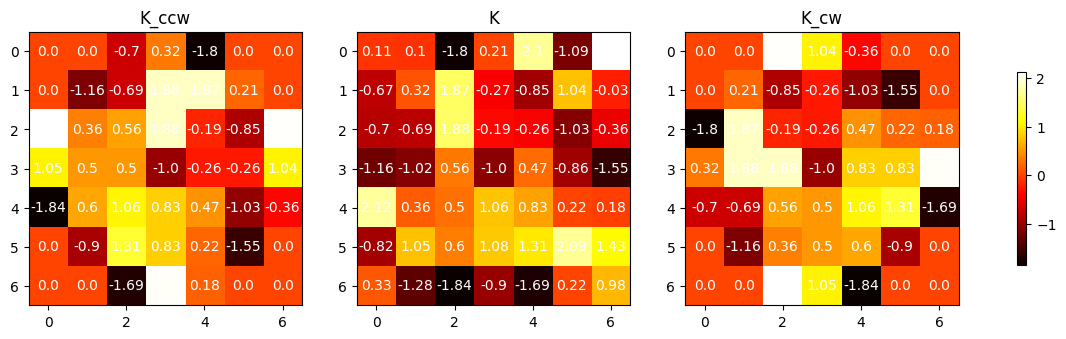

In [29]:
# visualize three kernals in one figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# plot the first kernal
axs[0].imshow(K_ccw, cmap='hot')
axs[0].set_title('K_ccw')

# noting the value of each element in the kernal
for i in range(K_ccw.shape[0]):
    for j in range(K_ccw.shape[1]):
        axs[0].text(j, i, round(K_ccw[i, j], 2), ha='center', va='center', color='white')

# plot the second kernal
axs[1].imshow(K, cmap='hot')
axs[1].set_title('K')
for i in range(K.shape[0]):
    for j in range(K.shape[1]):
        axs[1].text(j, i, round(K[i, j], 2), ha='center', va='center', color='white')

# plot the third kernal
im = axs[2].imshow(K_cw, cmap='hot')
axs[2].set_title('K_cw')
for i in range(K_cw.shape[0]):
    for j in range(K_cw.shape[1]):
        axs[2].text(j, i, round(K_cw[i, j], 2), ha='center', va='center', color='white')

# add a colorbar
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.5)

plt.show()


### 使用scipy进行rotate

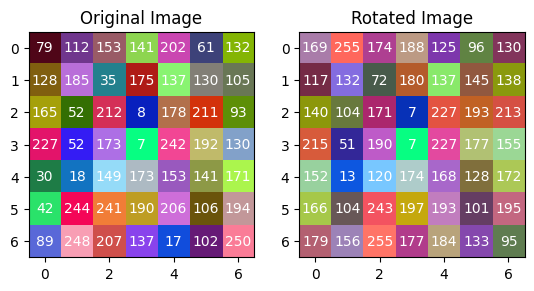

In [49]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Load the image
# image = plt.imread(r'C:\Users\songy\Pictures\001.jpg')

# generate a random image
arr = np.random.randint(0, 256, (7, 7, 3), dtype=np.uint8)
image = Image.fromarray(arr)

# Rotate the image by 45 degrees using bilinear interpolation
rotated_image = ndimage.rotate(image, 10, reshape=False, mode='wrap')

# transform the image to array
image = np.array(image)
rotated_image = np.array(rotated_image)

# Display the original and rotated images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        plt.text(j, i, image[i][j][0], ha='center', va='center', color='white')


plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title('Rotated Image')
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        plt.text(j, i, rotated_image[i][j][0], ha='center', va='center', color='white')


plt.show()
